In [1]:

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
trans_dataset = pd.read_excel(r"C:\Users\sarav\Desktop\Quantum virtual intern\QVI_transaction_data.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\sarav\\Desktop\\Quantum virtual intern\\QVI_transaction_data.xlsx'

In [ ]:
trans_dataset.info()


In [ ]:
trans_dataset.head()

In [59]:
customer_dataset = pd.read_excel(r"C:\Users\sarav\Desktop\DA pactice\Python\QVI_purchase_behaviour.xlsx")

In [60]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [61]:
customer_dataset.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [19]:
trans_dataset['dt'] = pd.to_datetime(trans_dataset['DATE'],unit='D',origin = '1899-12-30')

In [20]:
trans_dataset.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,dt
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [21]:
trans_dataset.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [22]:
trans_dataset['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

In [23]:
prd = trans_dataset['PROD_NAME'].value_counts().reset_index()

In [24]:
prd.rename(columns={'index':'product','PROD_NAME':'count'},inplace = True)

In [25]:
prd

,product,count
0,Kettle Mozzarella Basil & Pesto 175g,3304
1,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
2,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
3,Tyrrells Crisps Ched & Chives 165g,3268
4,Cobs Popd Sea Salt Chips 110g,3265
...,...,...
109,RRD Pc Sea Salt 165g,1431
110,Woolworths Medium Salsa 300g,1430
111,NCC Sour Cream & Garden Chives 175g,1419
112,French Fries Potato Chips 175g,1418


In [26]:
prd['product']=prd['product'].str.replace('\d+',' ')
prd['product']=prd['product'].str.replace('[#,@,&,/]',' ')

C:\Users\sarav\AppData\Local\Temp\ipykernel_22916\1506570580.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  prd['product']=prd['product'].str.replace('\d+',' ')
C:\Users\sarav\AppData\Local\Temp\ipykernel_22916\1506570580.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  prd['product']=prd['product'].str.replace('[#,@,&,/]',' ')


In [27]:
prd['product'].value_counts()

Kettle Mozzarella   Basil   Pesto  g     1
RRD Salt   Vinegar   g                   1
Smiths Crinkle Cut  Chips Chs Onion g    1
WW Sour Cream  OnionStacked Chips  g     1
Smiths Crinkle Cut  Chips Chicken  g     1
                                        ..
Tostitos Smoked     Chipotle  g          1
Kettle Tortilla ChpsBtroot Ricotta  g    1
Kettle Honey Soy    Chicken  g           1
Cheezels Cheese  g                       1
WW Crinkle Cut      Original  g          1
Name: product, Length: 114, dtype: int64

In [28]:
prd_name_clean = prd['product'].str.split(expand = True).stack().value_counts()

In [29]:
prd_name_clean.head(10)

g           111
Chips        21
Smiths       16
Cut          14
Crinkle      14
Kettle       13
Cheese       12
Salt         12
Original     10
Doritos       9
dtype: int64

In [30]:
chips = trans_dataset[trans_dataset['PROD_NAME'].str.contains('chip',regex=False)]

In [31]:
chips.shape

(0, 9)

In [32]:
salsa = trans_dataset[~trans_dataset['PROD_NAME'].str.contains('Salsa',regex=False)]

In [33]:
salsa.shape

(246742, 9)

In [34]:
trans_dataset.shape

(264836, 9)

In [35]:
salsa.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,43464.054875,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,105.396691,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,43373.000000,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,43464.000000,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [36]:
salsa.isnull().values.any()

False

<Axes: >

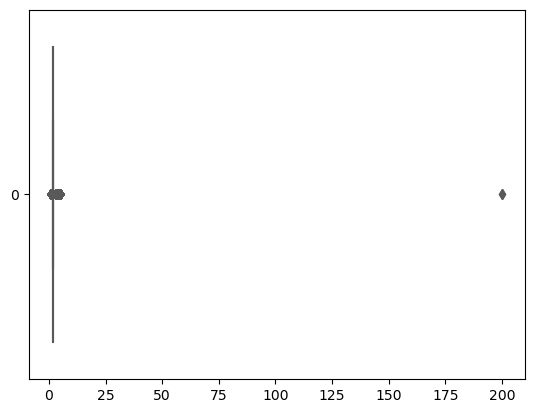

In [37]:
sns.boxplot(data = salsa.PROD_QTY, orient="h", palette = "Set2")

<Axes: title={'center': 'TOT_SALES'}, xlabel='PROD_QTY'>

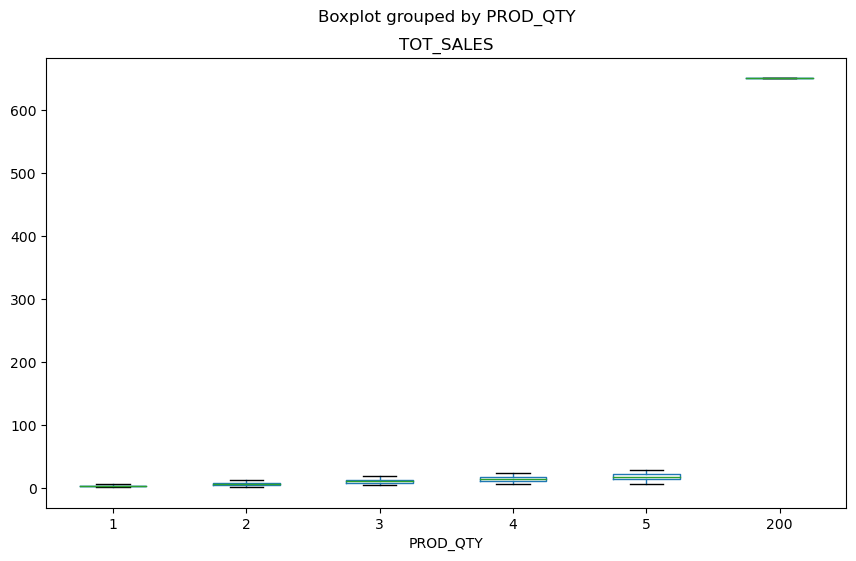

In [38]:
salsa.boxplot(by = 'PROD_QTY',column = ['TOT_SALES'], grid = False, figsize=(10,6))

In [39]:
salsa[salsa['PROD_QTY']>=100]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,dt
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


In [40]:
clean_salsa = salsa[salsa['LYLTY_CARD_NBR'] != 226000]

<Axes: title={'center': 'TOT_SALES'}, xlabel='PROD_QTY'>

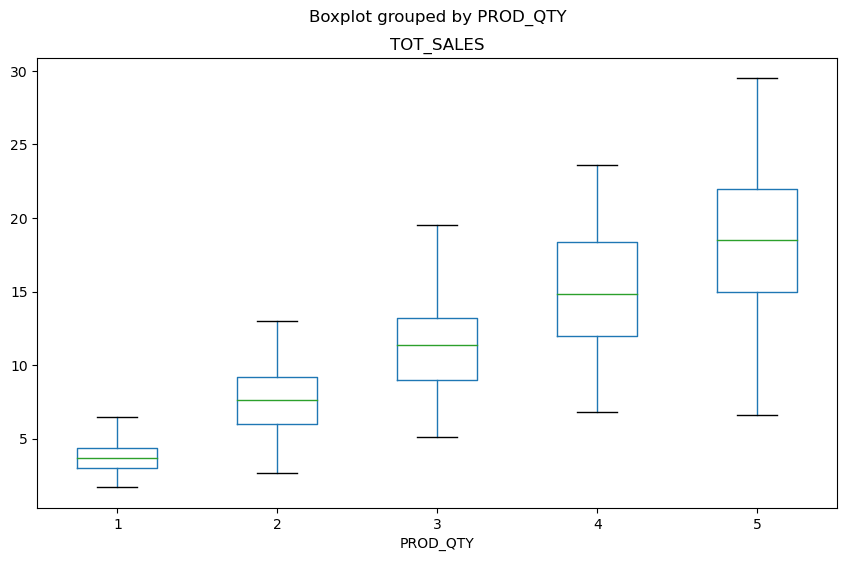

In [75]:
clean_salsa.boxplot(by='PROD_QTY',column = ['TOT_SALES'],grid=False,figsize=(10,6))

There is no outliner

In [41]:
clean_salsa['dt']=pd.to_datetime(clean_salsa['DATE'],unit='D',origin='1899-12-30')

C:\Users\sarav\AppData\Local\Temp\ipykernel_22916\2752984146.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salsa['dt']=pd.to_datetime(clean_salsa['DATE'],unit='D',origin='1899-12-30')


In [42]:
clean_salsa['dt']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: dt, Length: 246740, dtype: datetime64[ns]

In [43]:
clean_salsa.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,dt
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [44]:
dfcount = clean_salsa.groupby('dt').count()

In [45]:
dfcount

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
dt,,,,,,,,
2018-07-01,663,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660,660
...,...,...,...,...,...,...,...,...
2019-06-26,657,657,657,657,657,657,657,657
2019-06-27,669,669,669,669,669,669,669,669
2019-06-28,673,673,673,673,673,673,673,673


In [47]:
clean_salsa['size']=clean_salsa['PROD_NAME'].str.extract('(\d+)')
clean_salsa['size'].value_counts()

C:\Users\sarav\AppData\Local\Temp\ipykernel_22916\3984580403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salsa['size']=clean_salsa['PROD_NAME'].str.extract('(\d+)')


175    66390
150    40203
134    25102
110    22387
170    19983
165    15297
330    12540
380     6416
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: size, dtype: int64

<Axes: >

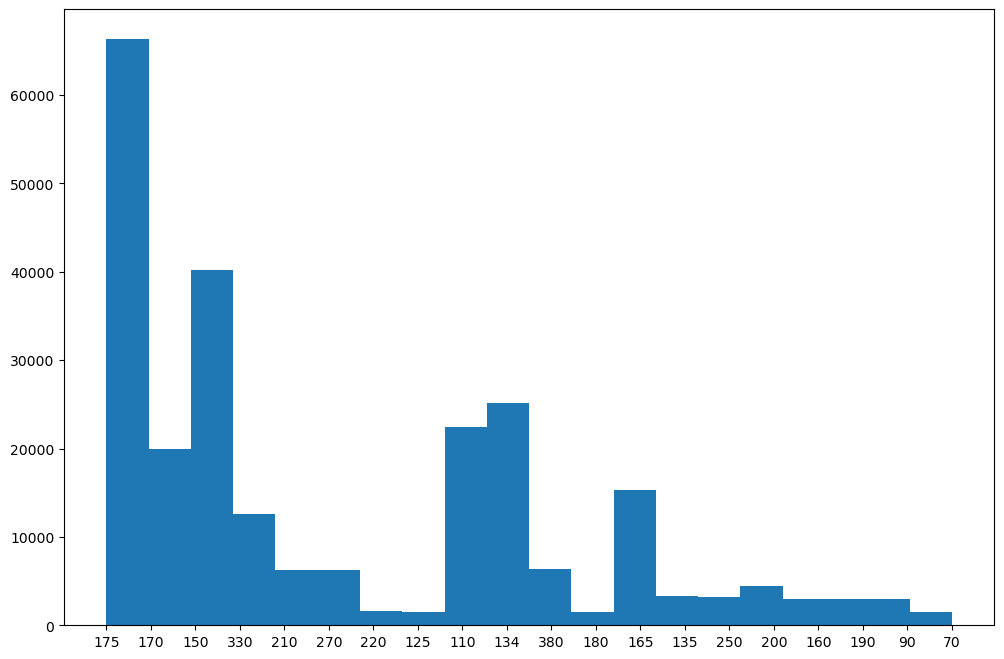

In [48]:
clean_salsa['size'].hist(bins=20,grid=False,figsize=(12,8))

Package with 175g weight bought more frequently than others and 70g package size is least frequently bought.

In [50]:
#Extract first name from PROD_NAME
clean_salsa['brand']=clean_salsa['PROD_NAME'].str.split(" ").str[0]
clean_salsa.head()

C:\Users\sarav\AppData\Local\Temp\ipykernel_22916\429149929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_salsa['brand']=clean_salsa['PROD_NAME'].str.split(" ").str[0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,dt,size,brand
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle


In [52]:
clean_salsa.brand.value_counts()

Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: brand, dtype: int64

In [55]:
clean_salsa.loc[clean_salsa['brand'] == 'Red','brand'] = 'RRD'


In [56]:
clean_salsa.loc[clean_salsa['brand'] == 'Dorito','brand'] = 'Doritos'

In [57]:
clean_salsa.brand.value_counts()

Kettle        41288
Smiths        27390
Doritos       25224
Pringles      25102
RRD           16321
Thins         14075
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: brand, dtype: int64

Top five brands with most transactions are Kettle,Smiths,Doritos,Pringles,RRD.Here, Kettle is most transaction done followed by others.

In [62]:
customer_dataset.sample(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
1370,4350,RETIREES,Budget
38603,144139,RETIREES,Budget
2616,8360,OLDER SINGLES/COUPLES,Mainstream
606,2413,RETIREES,Budget
34721,127159,YOUNG SINGLES/COUPLES,Mainstream
48887,183009,YOUNG SINGLES/COUPLES,Mainstream
56728,214373,NEW FAMILIES,Premium
7695,27231,NEW FAMILIES,Budget
14538,53432,YOUNG FAMILIES,Mainstream
62990,237063,RETIREES,Budget


In [65]:
customer_dataset.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

OBSERVATION:
Retirees lifestage customer has done more transcation followed by older singles/couples,young singles/couples. New families is least transaction done than others

In [68]:
customer_dataset.PREMIUM_CUSTOMER.value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

OBSERVATION:
Mainstream customer are more than other customer and premium customer are less.

In [79]:
customer_dataset['is_duplicated'] = customer_dataset.duplicated('LYLTY_CARD_NBR')
customer_dataset['is_duplicated'].sum()

0

In [83]:
merge = pd.merge(clean_salsa,customer_dataset,how='left',on=['LYLTY_CARD_NBR'])
merge.shape
                                            
                                                        

(246740, 14)

In [84]:
merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,dt,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,is_duplicated
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,175,Natural,YOUNG SINGLES/COUPLES,Premium,False
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14,175,CCs,MIDAGE SINGLES/COUPLES,Budget,False
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,False
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,False
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,False


In [87]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246740 non-null  int64         
 1   STORE_NBR         246740 non-null  int64         
 2   LYLTY_CARD_NBR    246740 non-null  int64         
 3   TXN_ID            246740 non-null  int64         
 4   PROD_NBR          246740 non-null  int64         
 5   PROD_NAME         246740 non-null  object        
 6   PROD_QTY          246740 non-null  int64         
 7   TOT_SALES         246740 non-null  float64       
 8   dt                246740 non-null  datetime64[ns]
 9   size              246740 non-null  object        
 10  brand             246740 non-null  object        
 11  LIFESTAGE         246740 non-null  object        
 12  PREMIUM_CUSTOMER  246740 non-null  object        
 13  is_duplicated     246740 non-null  bool          
dtypes: b

In [88]:
merge['DATE']=merge['dt']
merge.drop(['dt'],axis=1,inplace=True)

In [89]:
merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER,is_duplicated
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,False
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,False
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,False
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,False
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,False


In [94]:
merge.drop(['is_duplicated'],axis = 1,inplace=True)

In [95]:
merge.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,size,brand,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [3]:
merge.to_csv(r'QVI_dataset.csv', index=False)

NameError: name 'merge' is not defined

In [97]:
df = pd.read_csv('QVI_dataset.csv')

In [2]:
df.head()

NameError: name 'df' is not defined

In [1]:
df.info()

NameError: name 'df' is not defined

In [100]:
df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()

C:\Users\sarav\AppData\Local\Temp\ipykernel_22916\2531482752.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).sum()


STORE_NBR  LYLTY_CARD_NBR  \
PREMIUM_CUSTOMER LIFESTAGE                                           
Budget           MIDAGE SINGLES/COUPLES     641330       644440514   
                 NEW FAMILIES               380365       380867986   
                 OLDER FAMILIES            2881588      2891942530   
                 OLDER SINGLES/COUPLES     2318353      2332495098   
                 RETIREES                  1917631      1927702126   
                 YOUNG FAMILIES            2410844      2415761554   
                 YOUNG SINGLES/COUPLES     1154509      1158321877   
Mainstream       MIDAGE SINGLES/COUPLES    1496281      1500774290   
                 NEW FAMILIES               287481       288014877   
                 OLDER FAMILIES            1780625      1782766792   
                 OLDER SINGLES/COUPLES     2265662      2279764274   
                 RETIREES                  2745301      2753153856   
                 YOUNG FAMILIES            1634618      1641169212   
                 YOUNG SINGLES/COUPLES     2624060      2637061979   
Premium          MIDAGE SINGLES/COUPLES    1033933      1039707670   
                 NEW FAMILIES               201835       202109224   
                 OLDER FAMILIES            1403359      1404881088   
                 OLDER SINGLES/COUPLES     2222527      2228223157   
                 RETIREES                  1655552      1660094379   
                 YOUNG FAMILIES            1457226      1461126913   
                 YOUNG SINGLES/COUPLES      809246       810354894   

                                             TXN_ID  PROD_NBR  PROD_QTY  \
PREMIUM_CUSTOMER LIFESTAGE                                                
Budget           MIDAGE SINGLES/COUPLES   642288813    268427      8883   
                 NEW FAMILIES             380789234    160008      5241   
                 OLDER FAMILIES          2881775837   1209817     41853   
                 OLDER SINGLES/COUPLES   2320298702    967613     32883   
                 RETIREES                1918399243    795190     26932   
                 YOUNG FAMILIES          2412063244   1010965     34482   
                 YOUNG SINGLES/COUPLES   1154747066    487920     15500   
Mainstream       MIDAGE SINGLES/COUPLES  1500385149    615380     21213   
                 NEW FAMILIES             287803734    121152      4060   
                 OLDER FAMILIES          1780679553    748698     25804   
                 OLDER SINGLES/COUPLES   2266525908    966120     32607   
                 RETIREES                2746520511   1121770     37677   
                 YOUNG FAMILIES          1635696850    686662     23194   
                 YOUNG SINGLES/COUPLES   2625680359   1079249     36225   
Premium          MIDAGE SINGLES/COUPLES  1034352880    428798     14400   
                 NEW FAMILIES             201992124     85084      2769   
                 OLDER FAMILIES          1403077688    590961     20239   
                 OLDER SINGLES/COUPLES   2223619531    926743     31695   
                 RETIREES                1657119016    690206     23266   
                 YOUNG FAMILIES          1458192325    609895     20901   
                 YOUNG SINGLES/COUPLES    810057414    333687     10575   

                                         TOT_SALES     size  
PREMIUM_CUSTOMER LIFESTAGE                                   
Budget           MIDAGE SINGLES/COUPLES   33345.70   817091  
                 NEW FAMILIES             20607.45   493541  
                 OLDER FAMILIES          156863.75  3776704  
                 OLDER SINGLES/COUPLES   127833.60  3010847  
                 RETIREES                105916.30  2509228  
                 YOUNG FAMILIES          129717.95  3116691  
                 YOUNG SINGLES/COUPLES    57122.10  1486378  
Mainstream       MIDAGE SINGLES/COUPLES   84734.25  1973786  
                 NEW FAMILIES             15979.70   383751  
                 OLDER

In [106]:
PREMIUM_CUSTOMER = df.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES':['sum','count','mean','max','min']})
PREMIUM_CUSTOMER

TOT_SALES                            
                        sum  count      mean   max  min
PREMIUM_CUSTOMER                                       
Budget            631406.85  86762  7.277458  29.5  1.7
Mainstream        700865.40  95043  7.374193  29.5  1.7
Premium           472905.45  64935  7.282751  29.5  1.7

In [107]:
LIFESTAGE = df.groupby('LIFESTAGE').agg({'TOT_SALES':['sum','count','mean','max','min']})
LIFESTAGE

TOT_SALES                            
                              sum  count      mean   max  min
LIFESTAGE                                                    
MIDAGE SINGLES/COUPLES  172523.80  23398  7.373442  29.5  1.7
NEW FAMILIES             47347.95   6497  7.287664  27.0  1.7
OLDER FAMILIES          328519.90  45158  7.274899  29.5  1.7
OLDER SINGLES/COUPLES   376019.65  50793  7.402982  29.5  1.7
RETIREES                342381.90  46431  7.373994  29.5  1.7
YOUNG FAMILIES          294627.90  40494  7.275841  29.5  1.7
YOUNG SINGLES/COUPLES   243756.60  33969  7.175854  27.0  1.7

INSIGHT:
    Mainstream customers are bought more chips than any other and also mean has highest number in Mainstream customer. Premium customer has bought less chips.

<Axes: xlabel='PREMIUM_CUSTOMER'>

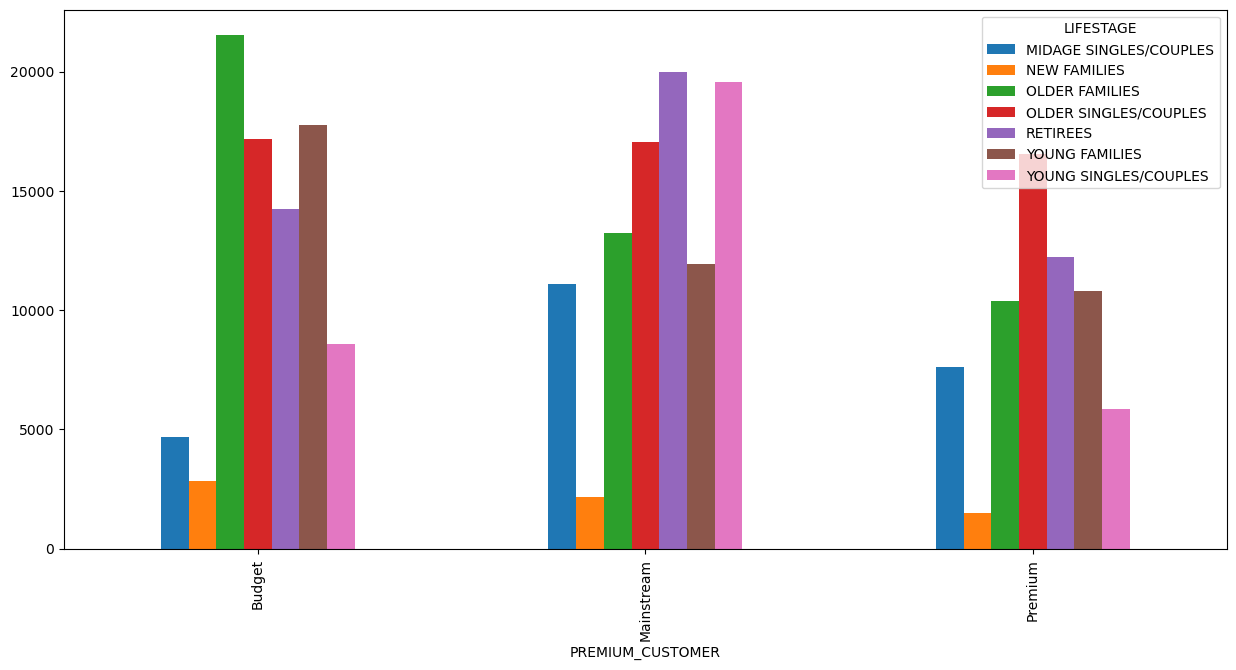

In [108]:
df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).size().unstack().plot(kind='bar', figsize=(15,7), stacked = False)

<Axes: xlabel='LIFESTAGE'>

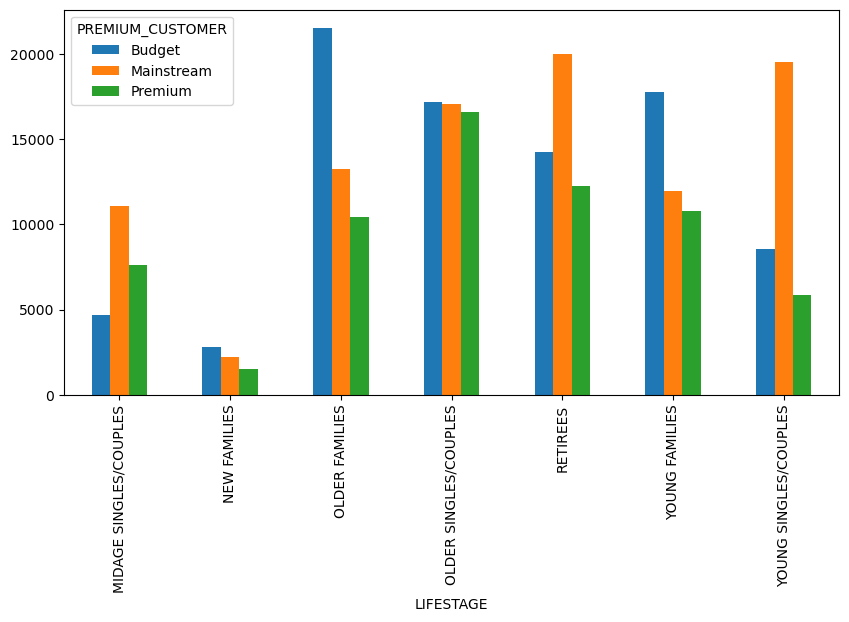

In [112]:
df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().unstack().plot(kind='bar', figsize=(10,5), stacked=False)

INSIGHT 2:
IN mainstream customers, Retriees lifestage customer were bought more chips than in other lifestage customers. 
In bugest customer, Old families were bought more chips.In premium customers, Old families were bought more chips. From that old families had more transaction than other and followed by retirees customers. New families had done low transaction with maximum budget customers.

In [119]:
premium_lifestage = df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'TOT_SALES':['sum','count','mean','max','min']})
premium_lifestage.columns = ['Sales_tot','Sales_count','Sales_mean','Sales_max','Sales_min']

premium_lifestage

Sales_tot  Sales_count  Sales_mean  \
PREMIUM_CUSTOMER LIFESTAGE                                                    
Budget           MIDAGE SINGLES/COUPLES   33345.70         4691    7.108442   
                 NEW FAMILIES             20607.45         2824    7.297256   
                 OLDER FAMILIES          156863.75        21514    7.291241   
                 OLDER SINGLES/COUPLES   127833.60        17172    7.444305   
                 RETIREES                105916.30        14225    7.445786   
                 YOUNG FAMILIES          129717.95        17763    7.302705   
                 YOUNG SINGLES/COUPLES    57122.10         8573    6.663023   
Mainstream       MIDAGE SINGLES/COUPLES   84734.25        11095    7.637156   
                 NEW FAMILIES             15979.70         2185    7.313364   
                 OLDER FAMILIES           96413.55        13241    7.281440   
                 OLDER SINGLES/COUPLES   124648.50        17061    7.306049   
                 RETIREES                145168.95        19970    7.269352   
                 YOUNG FAMILIES           86338.25        11947    7.226772   
                 YOUNG SINGLES/COUPLES   147582.20        19544    7.551279   
Premium          MIDAGE SINGLES/COUPLES   54443.85         7612    7.152371   
                 NEW FAMILIES             10760.80         1488    7.231720   
                 OLDER FAMILIES           75242.60        10403    7.232779   
                 OLDER SINGLES/COUPLES   123537.55        16560    7.459997   
                 RETIREES                 91296.65        12236    7.461315   
                 YOUNG FAMILIES           78571.70        10784    7.285951   
                 YOUNG SINGLES/COUPLES    39052.30         5852    6.673325   

                                         Sales_max  Sales_min  
PREMIUM_CUSTOMER LIFESTAGE                                     
Budget           MIDAGE SINGLES/COUPLES       28.5        1.7  
                 NEW FAMILIES                 27.0        1.7  
                 OLDER FAMILIES               28.5        1.7  
                 OLDER SINGLES/COUPLES        28.5        1.7  
                 RETIREES                     28.5        1.7  
                 YOUNG FAMILIES               29.5        1.7  
                 YOUNG SINGLES/COUPLES        27.0        1.7  
Mainstream       MIDAGE SINGLES/COUPLES       29.5        1.7  
                 NEW FAMILIES                 23.0        1.7  
                 OLDER FAMILIES               29.5        1.7  
                 OLDER SINGLES/COUPLES        28.5        1.7  
                 RETIREES                     29.5        1.7  
                 YOUNG FAMILIES               28.5        1.7  
                 YOUNG SINGLES/COUPLES        27.0        1.7  
Premium          MIDAGE SINGLES/COUPLES       28.5        1.7  
                 NEW FAMILIES                 23.0        1.7  
                 OLDER FAMILIES               29.5        1.7  
                 OLDER SINGLES/COUPLES        29.5        1.7  
                 RETIREES                     29.5        1.7  
                 YOUNG FAMILIES               23.0        1.7  
                 YOUNG SINGLES/COUPLES        21.6        1.7

In [120]:
premium_lifestage.sort_values('Sales_tot',ascending = False)

Sales_tot  Sales_count  Sales_mean  \
PREMIUM_CUSTOMER LIFESTAGE                                                    
Budget           OLDER FAMILIES          156863.75        21514    7.291241   
Mainstream       YOUNG SINGLES/COUPLES   147582.20        19544    7.551279   
                 RETIREES                145168.95        19970    7.269352   
Budget           YOUNG FAMILIES          129717.95        17763    7.302705   
                 OLDER SINGLES/COUPLES   127833.60        17172    7.444305   
Mainstream       OLDER SINGLES/COUPLES   124648.50        17061    7.306049   
Premium          OLDER SINGLES/COUPLES   123537.55        16560    7.459997   
Budget           RETIREES                105916.30        14225    7.445786   
Mainstream       OLDER FAMILIES           96413.55        13241    7.281440   
Premium          RETIREES                 91296.65        12236    7.461315   
Mainstream       YOUNG FAMILIES           86338.25        11947    7.226772   
                 MIDAGE SINGLES/COUPLES   84734.25        11095    7.637156   
Premium          YOUNG FAMILIES           78571.70        10784    7.285951   
                 OLDER FAMILIES           75242.60        10403    7.232779   
Budget           YOUNG SINGLES/COUPLES    57122.10         8573    6.663023   
Premium          MIDAGE SINGLES/COUPLES   54443.85         7612    7.152371   
                 YOUNG SINGLES/COUPLES    39052.30         5852    6.673325   
Budget           MIDAGE SINGLES/COUPLES   33345.70         4691    7.108442   
                 NEW FAMILIES             20607.45         2824    7.297256   
Mainstream       NEW FAMILIES             15979.70         2185    7.313364   
Premium          NEW FAMILIES             10760.80         1488    7.231720   

                                         Sales_max  Sales_min  
PREMIUM_CUSTOMER LIFESTAGE                                     
Budget           OLDER FAMILIES               28.5        1.7  
Mainstream       YOUNG SINGLES/COUPLES        27.0        1.7  
                 RETIREES                     29.5        1.7  
Budget           YOUNG FAMILIES               29.5        1.7  
                 OLDER SINGLES/COUPLES        28.5        1.7  
Mainstream       OLDER SINGLES/COUPLES        28.5        1.7  
Premium          OLDER SINGLES/COUPLES        29.5        1.7  
Budget           RETIREES                     28.5        1.7  
Mainstream       OLDER FAMILIES               29.5        1.7  
Premium          RETIREES                     29.5        1.7  
Mainstream       YOUNG FAMILIES               28.5        1.7  
                 MIDAGE SINGLES/COUPLES       29.5        1.7  
Premium          YOUNG FAMILIES               23.0        1.7  
                 OLDER FAMILIES               29.5        1.7  
Budget           YOUNG SINGLES/COUPLES        27.0        1.7  
Premium          MIDAGE SINGLES/COUPLES       28.5        1.7  
                 YOUNG SINGLES/COUPLES        21.6        1.7  
Budget           MIDAGE SINGLES/COUPLES       28.5        1.7  
                 NEW FAMILIES                 27.0        1.7  
Mainstream       NEW FAMILIES                 23.0        1.7  
Premium          NEW FAMILIES                 23.0        1.7

INSIGHT:
    Highest total sales had done in budget customer with older families lifestage customers followed by mainstream customer with young singles/couples and retriees.
    Premium customer with new families had bought less chips than others.
    

In [122]:
premium_lifestage.sort_values('Sales_mean',ascending = False)

Sales_tot  Sales_count  Sales_mean  \
PREMIUM_CUSTOMER LIFESTAGE                                                    
Mainstream       MIDAGE SINGLES/COUPLES   84734.25        11095    7.637156   
                 YOUNG SINGLES/COUPLES   147582.20        19544    7.551279   
Premium          RETIREES                 91296.65        12236    7.461315   
                 OLDER SINGLES/COUPLES   123537.55        16560    7.459997   
Budget           RETIREES                105916.30        14225    7.445786   
                 OLDER SINGLES/COUPLES   127833.60        17172    7.444305   
Mainstream       NEW FAMILIES             15979.70         2185    7.313364   
                 OLDER SINGLES/COUPLES   124648.50        17061    7.306049   
Budget           YOUNG FAMILIES          129717.95        17763    7.302705   
                 NEW FAMILIES             20607.45         2824    7.297256   
                 OLDER FAMILIES          156863.75        21514    7.291241   
Premium          YOUNG FAMILIES           78571.70        10784    7.285951   
Mainstream       OLDER FAMILIES           96413.55        13241    7.281440   
                 RETIREES                145168.95        19970    7.269352   
Premium          OLDER FAMILIES           75242.60        10403    7.232779   
                 NEW FAMILIES             10760.80         1488    7.231720   
Mainstream       YOUNG FAMILIES           86338.25        11947    7.226772   
Premium          MIDAGE SINGLES/COUPLES   54443.85         7612    7.152371   
Budget           MIDAGE SINGLES/COUPLES   33345.70         4691    7.108442   
Premium          YOUNG SINGLES/COUPLES    39052.30         5852    6.673325   
Budget           YOUNG SINGLES/COUPLES    57122.10         8573    6.663023   

                                         Sales_max  Sales_min  
PREMIUM_CUSTOMER LIFESTAGE                                     
Mainstream       MIDAGE SINGLES/COUPLES       29.5        1.7  
                 YOUNG SINGLES/COUPLES        27.0        1.7  
Premium          RETIREES                     29.5        1.7  
                 OLDER SINGLES/COUPLES        29.5        1.7  
Budget           RETIREES                     28.5        1.7  
                 OLDER SINGLES/COUPLES        28.5        1.7  
Mainstream       NEW FAMILIES                 23.0        1.7  
                 OLDER SINGLES/COUPLES        28.5        1.7  
Budget           YOUNG FAMILIES               29.5        1.7  
                 NEW FAMILIES                 27.0        1.7  
                 OLDER FAMILIES               28.5        1.7  
Premium          YOUNG FAMILIES               23.0        1.7  
Mainstream       OLDER FAMILIES               29.5        1.7  
                 RETIREES                     29.5        1.7  
Premium          OLDER FAMILIES               29.5        1.7  
                 NEW FAMILIES                 23.0        1.7  
Mainstream       YOUNG FAMILIES               28.5        1.7  
Premium          MIDAGE SINGLES/COUPLES       28.5        1.7  
Budget           MIDAGE SINGLES/COUPLES       28.5        1.7  
Premium          YOUNG SINGLES/COUPLES        21.6        1.7  
Budget           YOUNG SINGLES/COUPLES        27.0        1.7

INSIGHT:
    Highest average had done to mainstream customer with midage and young singles/couples followed by premium retirees customers. They has bought less frequently but with high rate per sales.
    Budget young singles/couples had a lowest average of all.

In [123]:
df.PROD_QTY.value_counts()

2    220070
1     25476
5       415
3       408
4       371
Name: PROD_QTY, dtype: int64

In [125]:
df['vol']=df['PROD_QTY']*df['size']
df['vol'].describe()

count    246740.000000
mean        334.822631
std         130.229616
min          70.000000
25%         268.000000
50%         330.000000
75%         350.000000
max        1900.000000
Name: vol, dtype: float64

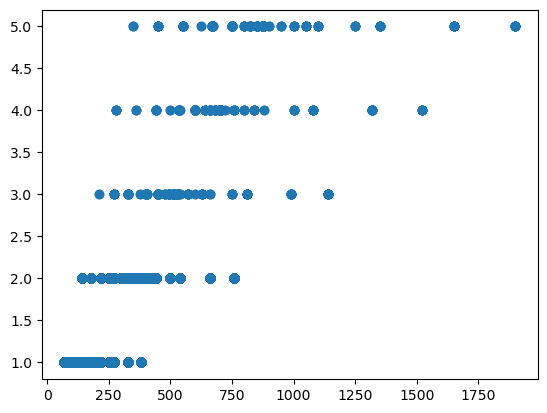

In [127]:
plt.scatter(df['vol'],df['PROD_QTY'])

<Axes: xlabel='LIFESTAGE'>

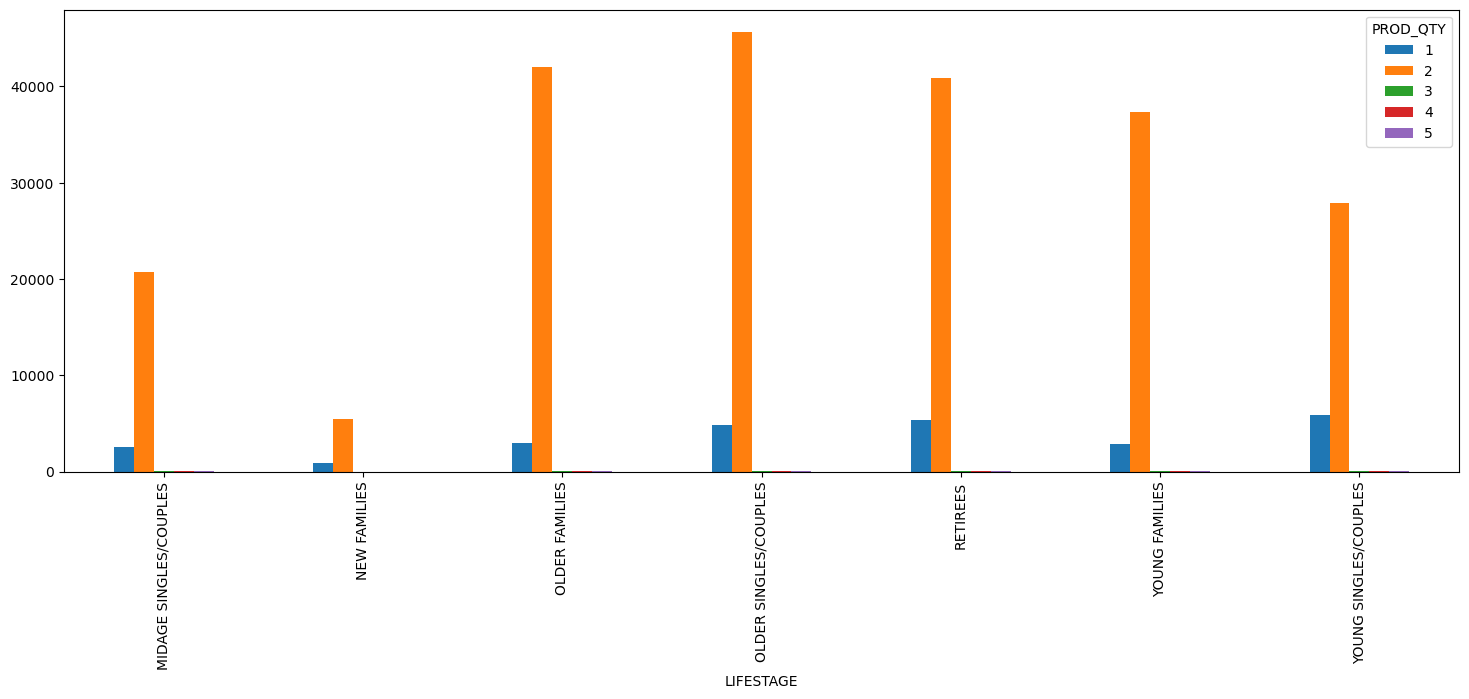

In [139]:
df.groupby(['LIFESTAGE','PROD_QTY']).size().unstack().plot(kind = 'bar',figsize=(18,6),stacked= False)

<Axes: xlabel='PREMIUM_CUSTOMER'>

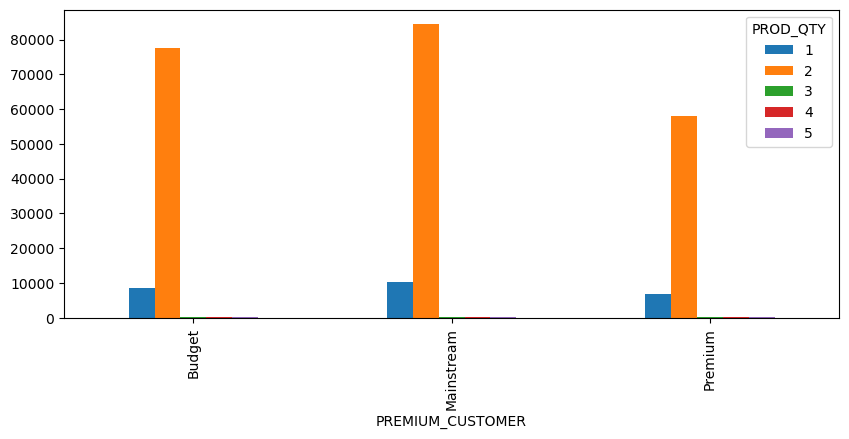

In [140]:
df.groupby(['PREMIUM_CUSTOMER','PROD_QTY']).size().unstack().plot(kind='bar',figsize=(10,4),stacked=False)

In [145]:
premium_lifestage=df.groupby(['PREMIUM_CUSTOMER']).agg({'vol':['sum','mean','count','max','min']})
premium_lifestage.columns = ['vol_tot','vol_mean','vol_count','vol_max','vol_min']
premium_lifestage.sort_values('vol_tot')

,vol_tot,vol_mean,vol_count,vol_max,vol_min
PREMIUM_CUSTOMER,,,,,
Premium,21719763,334.484685,64935,1900,70
Budget,29082659,335.200422,86762,1900,70
Mainstream,31811714,334.708648,95043,1900,70


In [147]:
premium_lifestage = df.groupby(['LIFESTAGE']).agg({'vol':['sum','mean','count','max','min']})
premium_lifestage.columns = ['vol_tot','vol_mean','vol_count','vol_max','vol_min']
premium_lifestage.sort_values('vol_tot')

,vol_tot,vol_mean,vol_count,vol_max,vol_min
LIFESTAGE,,,,,
NEW FAMILIES,2116371,325.745883,6497,1900,70
MIDAGE SINGLES/COUPLES,7835153,334.864219,23398,1900,70
YOUNG SINGLES/COUPLES,10992208,323.595278,33969,1350,70
YOUNG FAMILIES,13742340,339.367314,40494,1900,70
OLDER FAMILIES,15401819,341.065127,45158,1900,70
RETIREES,15459378,332.953802,46431,1900,70
OLDER SINGLES/COUPLES,17066867,336.008249,50793,1900,70


In [149]:
premium_lifestage = df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'vol':['sum','mean','count','max','min']})
premium_lifestage.columns = ['vol_tot','vol_mean','vol_count','vol_max','vol_min']
premium_lifestage.sort_values('vol_tot',ascending=False)

vol_tot    vol_mean  vol_count  \
PREMIUM_CUSTOMER LIFESTAGE                                                
Budget           OLDER FAMILIES          7349535  341.616389      21514   
Mainstream       RETIREES                6601460  330.568853      19970   
                 YOUNG SINGLES/COUPLES   6458809  330.475287      19544   
Budget           YOUNG FAMILIES          6052734  340.749536      17763   
                 OLDER SINGLES/COUPLES   5769291  335.970825      17172   
Mainstream       OLDER SINGLES/COUPLES   5704210  334.342067      17061   
Premium          OLDER SINGLES/COUPLES   5593366  337.763647      16560   
Budget           RETIREES                4755546  334.309033      14225   
Mainstream       OLDER FAMILIES          4520334  341.389170      13241   
Premium          RETIREES                4102372  335.270677      12236   
Mainstream       YOUNG FAMILIES          4039867  338.149075      11947   
                 MIDAGE SINGLES/COUPLES  3773230  340.083822      11095   
Premium          YOUNG FAMILIES          3649739  338.440189      10784   
                 OLDER FAMILIES          3531950  339.512641      10403   
Budget           YOUNG SINGLES/COUPLES   2691413  313.940628       8573   
Premium          MIDAGE SINGLES/COUPLES  2513942  330.260378       7612   
                 YOUNG SINGLES/COUPLES   1841986  314.761791       5852   
Budget           MIDAGE SINGLES/COUPLES  1547981  329.989554       4691   
                 NEW FAMILIES             916159  324.418909       2824   
Mainstream       NEW FAMILIES             713804  326.683753       2185   
Premium          NEW FAMILIES             486408  326.887097       1488   

                                         vol_max  vol_min  
PREMIUM_CUSTOMER LIFESTAGE                                 
Budget           OLDER FAMILIES             1650       70  
Mainstream       RETIREES                   1900       70  
                 YOUNG SINGLES/COUPLES      1350       70  
Budget           YOUNG FAMILIES             1900       70  
                 OLDER SINGLES/COUPLES      1650       70  
Mainstream       OLDER SINGLES/COUPLES      1900       70  
Premium          OLDER SINGLES/COUPLES      1900       70  
Budget           RETIREES                   1650       70  
Mainstream       OLDER FAMILIES             1900       70  
Premium          RETIREES                   1900       70  
Mainstream       YOUNG FAMILIES             1650       70  
                 MIDAGE SINGLES/COUPLES     1900       70  
Premium          YOUNG FAMILIES             1350       70  
                 OLDER FAMILIES             1900       70  
Budget           YOUNG SINGLES/COUPLES      1080       70  
Premium          MIDAGE SINGLES/COUPLES     1650       70  
                 YOUNG SINGLES/COUPLES      1100       70  
Budget           MIDAGE SINGLES/COUPLES     1650       70  
                 NEW FAMILIES               1350       70  
Mainstream       NEW FAMILIES               1900       70  
Premium          NEW FAMILIES                760       70

INSIGHT:
    Budget older families and mainstream retirees have purchased highest volumn of chips.
    Premium and mainstream new families have purchased least volumn of chips.
    Mainstream users purchased more volumn of chips.

In [150]:
df['avg_price'] = df['TOT_SALES']/df['PROD_QTY']

In [155]:
price_group = df.groupby(['PREMIUM_CUSTOMER','LIFESTAGE']).agg({'avg_price':['mean','count','sum']})
price_group.sort_values(('avg_price','mean'),ascending=False)

avg_price                 
                                             mean  count       sum
PREMIUM_CUSTOMER LIFESTAGE                                        
Mainstream       YOUNG SINGLES/COUPLES   4.065642  19544  79458.90
                 MIDAGE SINGLES/COUPLES  3.994241  11095  44316.10
Budget           RETIREES                3.924404  14225  55824.65
Premium          RETIREES                3.920942  12236  47976.65
Budget           NEW FAMILIES            3.917688   2824  11063.55
Mainstream       NEW FAMILIES            3.916133   2185   8556.75
Premium          OLDER SINGLES/COUPLES   3.893182  16560  64471.10
Budget           OLDER SINGLES/COUPLES   3.882096  17172  66663.35
Premium          NEW FAMILIES            3.872110   1488   5761.70
Mainstream       RETIREES                3.844294  19970  76770.55
                 OLDER SINGLES/COUPLES   3.814665  17061  65082.00
Premium          MIDAGE SINGLES/COUPLES  3.770698   7612  28702.55
                 YOUNG FAMILIES          3.762150  10784  40571.03
Budget           YOUNG FAMILIES          3.760737  17763  66801.97
                 OLDER FAMILIES          3.745340  21514  80577.25
                 MIDAGE SINGLES/COUPLES  3.743328   4691  17559.95
Mainstream       OLDER FAMILIES          3.737077  13241  49482.64
                 YOUNG FAMILIES          3.724533  11947  44497.00
Premium          OLDER FAMILIES          3.717000  10403  38667.95
                 YOUNG SINGLES/COUPLES   3.665414   5852  21450.00
Budget           YOUNG SINGLES/COUPLES   3.657366   8573  31354.60

In [ ]:
Insight:
    Mainstream young single/couples has highest average price per unit sold.

In [157]:
price_group.to_csv('QVI_task1.csv')